In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import statsmodels.api as stat
import seaborn as sns
from sklearn.linear_model import LinearRegression

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [13]:
raw_data = pd.read_csv('/Users/sazid/Downloads/1.04.+Real-life+example (1).csv')
with pd.option_context('display.max_rows', None):
 display(raw_data)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.00,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,Golf IV


In [14]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [15]:
raw_data = raw_data.drop('Model', axis=1)
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [16]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [17]:
raw_data= raw_data.dropna(axis=0)
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

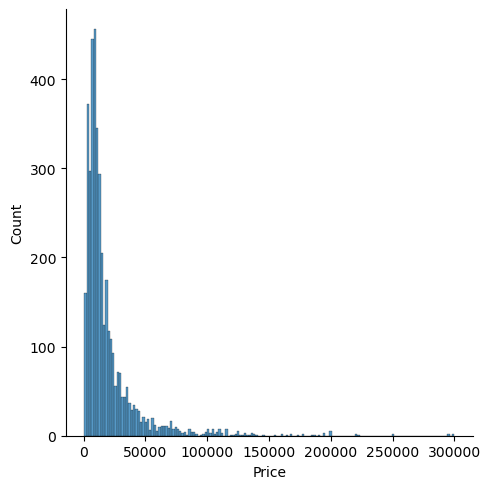

In [18]:
sns.displot(raw_data['Price'])
raw_data['Price'].describe()

In [19]:
x=raw_data['Price'].quantile(.97)

In [20]:
raw_data=raw_data[raw_data['Price']<x]
raw_data.describe()

,Price,Mileage,EngineV,Year
count,3904.000000,3904.000000,3904.000000,3904.000000
mean,16082.648299,168.296363,2.730789,2006.108607
std,14520.658287,101.330483,5.004271,6.611815
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,97.750000,1.800000,2002.000000
50%,11000.000000,160.000000,2.200000,2007.000000
75%,20300.000000,231.000000,3.000000,2011.000000
max,81500.000000,980.000000,99.990000,2016.000000


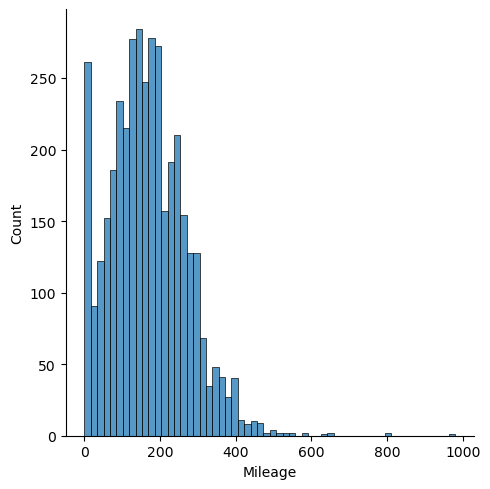

In [21]:
sns.displot(raw_data['Mileage'])

In [22]:
x= raw_data['Mileage'].quantile(.98)
raw_data= raw_data[raw_data['Mileage']<x]
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3816,3816.000000,3816,3816.000000,3816.000000,3816,3816,3816.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,859,NaN,1468,NaN,NaN,1737,3454,NaN
mean,NaN,16305.865556,NaN,161.563155,2.739439,NaN,NaN,2006.350891
std,NaN,14553.084440,NaN,90.985155,5.060295,NaN,NaN,6.424502
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,95.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,226.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='EngineV', ylabel='Count'>

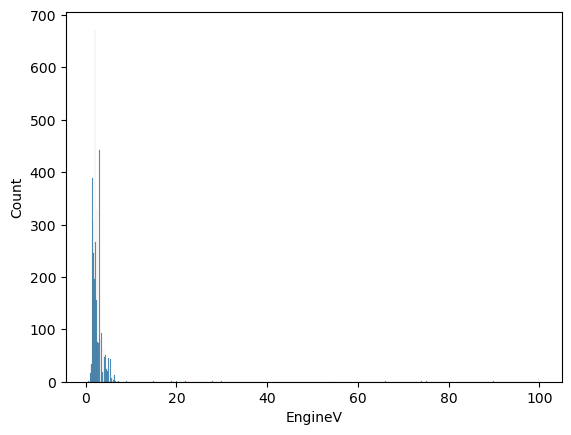

In [23]:
sns.histplot(raw_data['EngineV'])

In [24]:
raw_data=raw_data[raw_data['EngineV']<6]
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3766,3766.000000,3766,3766.000000,3766.000000,3766,3766,3766.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,854,NaN,1440,NaN,NaN,1729,3410,NaN
mean,NaN,16170.434668,NaN,161.682156,2.398186,NaN,NaN,2006.357674
std,NaN,14349.101870,NaN,91.079331,0.889905,NaN,NaN,6.438538
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,96.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11400.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,226.000000,3.000000,NaN,NaN,2011.000000


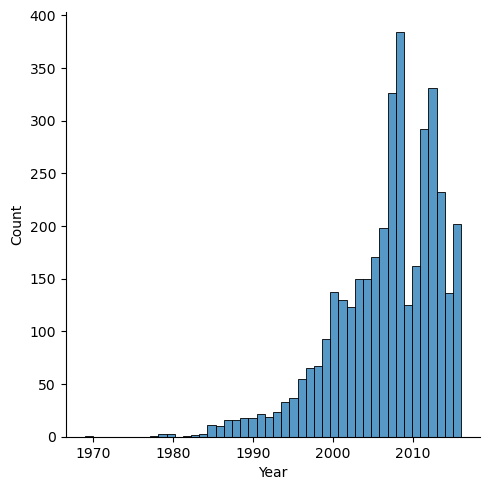

In [25]:
sns.displot(raw_data['Year'])

In [26]:
x=raw_data['Year'].quantile(.02)
raw_data=raw_data[raw_data['Year']>x]
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [27]:
raw_data = raw_data.reset_index(drop=True)
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3676,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007
3677,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3678,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3679,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


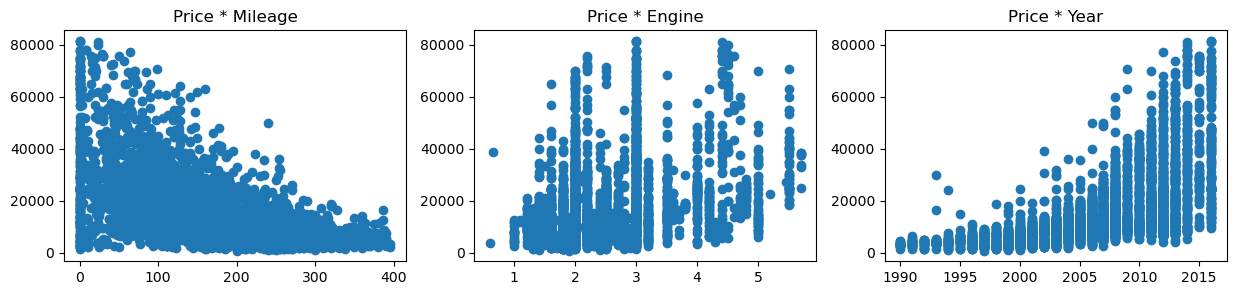

In [28]:
f, (ax1, ax2, ax3) = mat.subplots(1, 3,figsize=(15,3))
ax1.scatter(raw_data['Mileage'],raw_data['Price'])
ax1.set_title('Price * Mileage')
ax2.set_title('Price * Engine')
ax2.scatter(raw_data['EngineV'],raw_data['Price'])
ax3.set_title('Price * Year')
ax3.scatter(raw_data['Year'],raw_data['Price'])


In [29]:
log_price = np.log(raw_data['Price'])
raw_data['Price']=log_price
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,2003
2,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
3,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
4,Audi,9.560997,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3676,Renault,8.824678,sedan,152,1.6,Petrol,yes,2007
3677,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008
3678,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
3679,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999


In [30]:
cleaned_data = raw_data
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3681,3681.000000,3681,3681.000000,3681.000000,3681,3681,3681.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,831,NaN,1387,NaN,NaN,1712,3326,NaN
mean,NaN,9.388975,NaN,160.603097,2.406648,NaN,NaN,2006.824776
std,NaN,0.810492,NaN,90.065965,0.894217,NaN,NaN,5.700591
min,NaN,6.684612,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,8.895630,NaN,96.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,9.350102,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,9.942708,NaN,223.000000,3.000000,NaN,NaN,2011.000000


In [31]:
cleaned_data.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [33]:
vif

,VIF,features
0,4.168854,Mileage
1,10.797464,Year
2,8.271543,EngineV


In [34]:
cleaned_data = cleaned_data.drop(['Year'], axis=1)

In [35]:
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,8.342840,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes
2,Audi,10.043249,crossover,240,4.2,Petrol,yes
3,Toyota,9.814656,crossover,120,2.0,Petrol,yes
4,Audi,9.560997,vagon,200,2.7,Diesel,yes
...,...,...,...,...,...,...,...
3676,Renault,8.824678,sedan,152,1.6,Petrol,yes
3677,Volkswagen,9.350102,van,163,2.5,Diesel,yes
3678,Toyota,9.792556,sedan,35,1.6,Petrol,yes
3679,BMW,8.779557,sedan,1,3.5,Petrol,yes


In [36]:
cleaned_data = pd.get_dummies(cleaned_data,drop_first=True)
cleaned_data

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
2,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
4,9.560997,200,2.7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,8.824678,152,1.6,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
3677,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3678,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3679,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [37]:
cleaned_data.columns

Index(['Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [38]:
cleaned_data.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
2,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
4,9.560997,200,2.7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [39]:
target = cleaned_data['Price']

inputs = cleaned_data.drop(['Price'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [42]:
scaled_inputs = scaler.transform(inputs)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,target, test_size=.2, random_state=3)

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_hat_train = reg.predict(x_train)

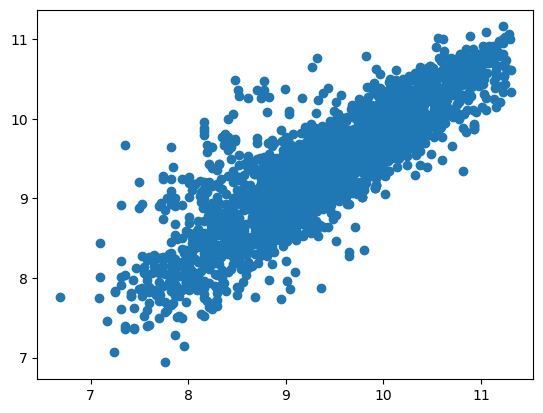

In [46]:
mat.scatter(y_train,y_hat_train)


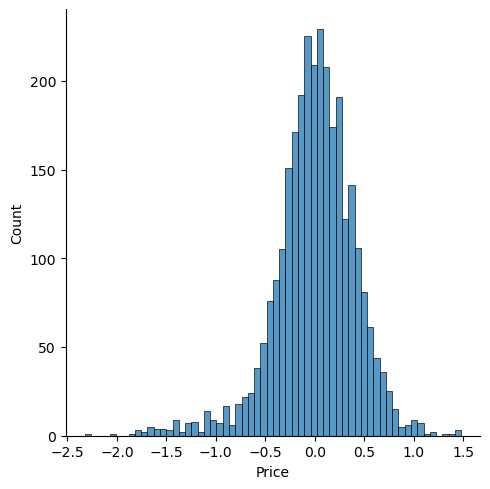

In [47]:
sns.displot(y_train-y_hat_train)

In [48]:
y_hat_test = reg.predict(x_test)

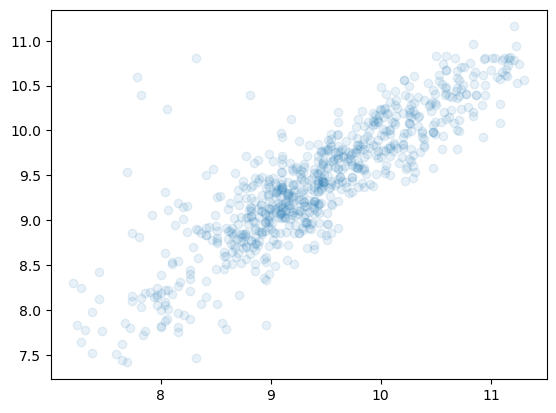

In [49]:
mat.scatter(y_test,y_hat_test, alpha=.1)

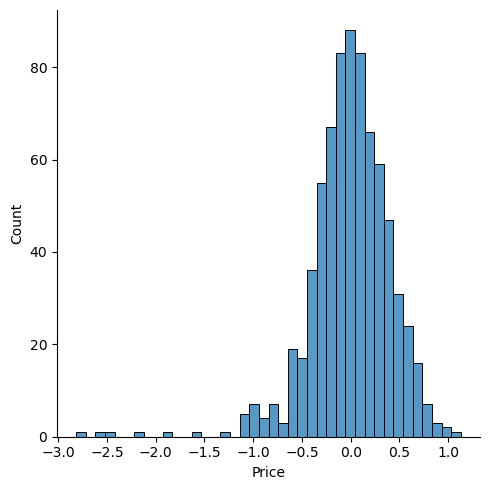

In [50]:
sns.displot(y_test-y_hat_test)

In [51]:
x= pd.DataFrame(np.exp(y_hat_test), columns=['Predict'])
x['Target_test']= np.exp(y_test).reset_index(drop=True)

In [52]:
x['Residual']=x['Target_test']-x['Predict']
x['%']= np.absolute(x['Residual']/x['Target_test']*100)
x.describe()

,Predict,Target_test,Residual,%
count,737.000000,737.000000,737.000000,737.000000
mean,15563.783506,17049.240516,1485.457009,36.957428
std,11061.229267,15084.252842,7875.896437,94.505994
min,1657.851269,1350.000000,-45577.984358,0.082112
25%,7878.402154,7300.000000,-2235.767208,10.322666
50%,12264.713731,11800.000000,166.663298,22.844099
75%,19831.285306,21999.000000,3325.276112,37.770717
max,70215.131075,81000.000000,42217.977543,1569.746557


In [53]:
pd.options.display.max_rows = None
x.sort_values(by=['%'])

,Predict,Target_test,Residual,%
303,17814.616024,17800.00,-14.616024,0.082112
375,24321.606369,24300.00,-21.606369,0.088915
54,29869.519085,29900.00,30.480915,0.101943
574,16781.904324,16800.00,18.095676,0.107712
687,5407.571877,5400.00,-7.571877,0.140220
483,9586.173641,9600.00,13.826359,0.144025
371,8881.661703,8900.00,18.338297,0.206048
280,9931.107700,9900.00,-31.107700,0.314219
62,17054.208073,16999.00,-55.208073,0.324772
18,19831.285306,19900.00,68.714694,0.345300


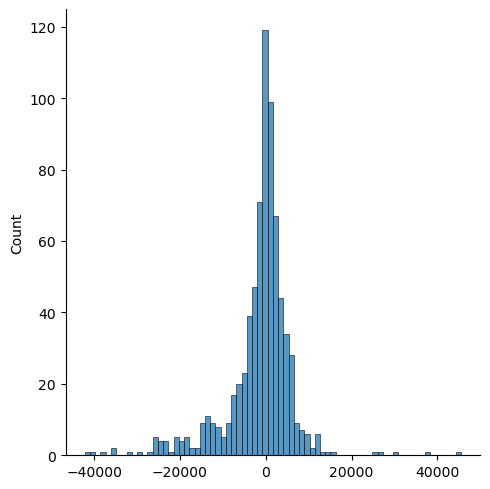

In [56]:
sns.displot(x['Predict']-x['Target_test'])

In [57]:
from scipy.stats import pearsonr

# Assuming you have two pandas Series or arrays: x and y
corr_coefficient, p_value = pearsonr(cleaned_data['Price'], cleaned_data['EngineV'])

print(f"Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

Correlation Coefficient: 0.3851973063613902
P-Value: 1.6702446589489883e-130


In [59]:
round(1.6702446589489883e-130)

0